In [1]:
from io import BytesIO

import torch

import PIL
import requests
from diffusers import RePaintPipeline, RePaintScheduler


def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")


img_url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/repaint/celeba_hq_256.png"
mask_url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/repaint/mask_256.png"

# Load the original image and the mask as PIL images
original_image = download_image(img_url).resize((256, 256))
mask_image = download_image(mask_url).resize((256, 256))

# Load the RePaint scheduler and pipeline based on a pretrained DDPM model
scheduler = RePaintScheduler.from_pretrained("google/ddpm-ema-celebahq-256")
pipe = RePaintPipeline.from_pretrained("google/ddpm-ema-celebahq-256", scheduler=scheduler)
pipe = pipe.to("cuda")

generator = torch.Generator(device="cuda").manual_seed(0)
output = pipe(
    image=original_image,
    mask_image=mask_image,
    num_inference_steps=250,
    eta=0.0,
    jump_length=10,
    jump_n_sample=10,
    generator=generator,
)
inpainted_image = output.images[0]

diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

/opt/conda/envs/sparsedc/lib/python3.9/site-packages/diffusers/pipelines/deprecated/repaint/pipeline_repaint.py:35: FutureWarning: The preprocess method is deprecated and will be removed in diffusers 1.0.0. Please use VaeImageProcessor.preprocess(...) instead
  deprecate("preprocess", "1.0.0", deprecation_message, standard_warn=False)


1111  "prepare random noise"
1111  "tensor[1, 3, 256, 256] n=196608 (0.8Mb) x∈[-5.116, 4.268] μ=0.001 σ=1.000 cuda:0"


  0%|          | 0/4570 [00:00<?, ?it/s]

1111  "tensor i64 cuda:0 996" "tensor i64 cuda:0 997"
2222  "unet inference"
2222  "tensor[1, 3, 256, 256] n=196608 (0.8Mb) x∈[-5.107, 4.268] μ=0.001 σ=1.000 cuda:0"
3333  "scheduler step"
3333  "tensor[1, 3, 256, 256] n=196608 (0.8Mb) x∈[-4.376, 4.240] μ=-0.002 σ=0.999 cuda:0"
1111  "tensor i64 cuda:0 992" "tensor i64 cuda:0 996"
2222  "unet inference"
2222  "tensor[1, 3, 256, 256] n=196608 (0.8Mb) x∈[-4.379, 4.241] μ=0.000 σ=1.000 cuda:0"
3333  "scheduler step"
3333  "tensor[1, 3, 256, 256] n=196608 (0.8Mb) x∈[-4.376, 4.783] μ=-0.001 σ=1.000 cuda:0"
1111  "tensor i64 cuda:0 988" "tensor i64 cuda:0 992"
2222  "unet inference"
2222  "tensor[1, 3, 256, 256] n=196608 (0.8Mb) x∈[-4.376, 4.792] μ=0.000 σ=1.000 cuda:0"
3333  "scheduler step"
3333  "tensor[1, 3, 256, 256] n=196608 (0.8Mb) x∈[-4.526, 4.240] μ=-0.002 σ=0.999 cuda:0"
1111  "tensor i64 cuda:0 984" "tensor i64 cuda:0 988"
2222  "unet inference"
2222  "tensor[1, 3, 256, 256] n=196608 (0.8Mb) x∈[-4.527, 4.240] μ=0.000 σ=0.999 cuda:

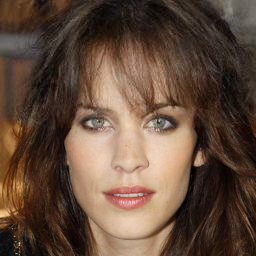

In [2]:
inpainted_image